IndexError: index 1 is out of bounds for dimension 0 with size 1

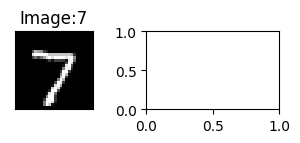

In [24]:
import torch
from torchvision import transforms
from torchvision import datasets
from torch.utils.data import DataLoader
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt


lr = 0.01
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))])

# 加载MNIST数据集
train_dataset = datasets.MNIST(root='../dataset/mnist/', train=True, download=True, transform=transform)
train_loader = DataLoader(train_dataset, shuffle=True, batch_size=batch_size)
test_dataset = datasets.MNIST(root='../dataset/mnist/', train=False, download=True, transform=transform)
test_loader = DataLoader(test_dataset, shuffle=False, batch_size=batch_size)

# 可视化测试集中的一些样本
examples = enumerate(test_loader)
batch_idx, (example_data, example_label) = next(examples)
for i in range(16):
    plt.subplot(4, 4, i + 1)
    plt.tight_layout()
    plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
    plt.title("Image:{}".format(example_label[i]))
    plt.xticks([])
    plt.yticks([])
plt.show()

In [20]:
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

# 定义神经网络模型
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=5) # 1通道 -> 32通道，28 * 28 -> 24 * 24, 池化2*2max
        self.conv2 = nn.Conv2d(32, 64, kernel_size=5)# 32通道 -> 64通道，12 * 12-> 8 * 8  池化2*2max
        self.fc1 = nn.Linear(64 * 4 * 4 * 64, 128) 
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2(x), 2))
        x = x.view(-1, 64 * 4 * 4 * 64)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

model = Net()

# 定义损失函数和优化器
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=lr)

# 定义训练函数
def train(epoch):
    running_loss = 0.0
    for batch_idx, (data, target) in enumerate(train_loader, 0):
        # 梯度清零
        optimizer.zero_grad()
        # 前向传播
        output = model(data)
        # 计算损失
        loss = criterion(output, target)
        # 反向传播
        loss.backward()
        # 更新参数
        optimizer.step()
        running_loss += loss.item()
        if batch_idx % 300 == 299:
            print('[%d, %5d] loss: %.3f' % (epoch+1, batch_idx+1, running_loss/300))
            running_loss = 0.0

# 定义测试函数
def test():
    correct = 0
    total = 0
    with torch.no_grad():
        for data, target in test_loader:
            # 获取测试数据
            output = model(data)
            # 预测类别
            _, predicted = torch.max(output.data, dim=1) 
            total += target.size(0)
            # 统计预测正确的样本数
            correct += (predicted == target).sum().item()
    # 输出测试准确率
    print('accuracy on test set: %d %% ' % (100*correct/total)) 

# 主程序入口
if __name__ == '__main__':
    for epoch in range(10):
        train(epoch)
        test()

ValueError: Expected input batch_size (1) to match target batch_size (64).

50.0

In [3]:
image_idx = 0  # 假设想查看第一张图像的大小
image_size = train_loader.dataset.data[image_idx].shape
print(image_size)


torch.Size([28, 28])


In [12]:
16 * 64


1024

In [16]:
65536 / 64

1024.0

In [17]:
4 * 4 * 2

32

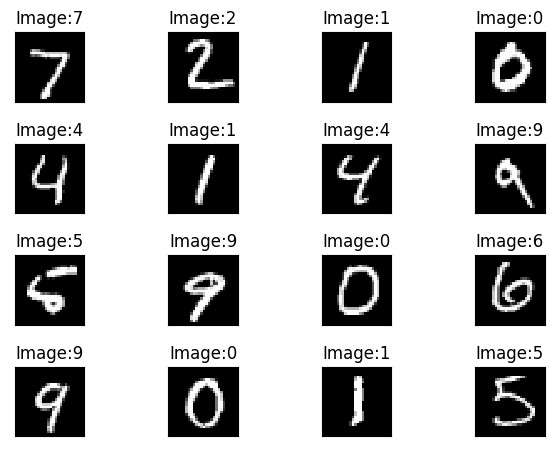

[1,   300] loss: 0.917
accuracy on test set: 93 % 
[2,   300] loss: 0.197


KeyboardInterrupt: 

In [25]:
import torch
from torchvision import transforms
from torchvision import datasets
from torch.utils.data import DataLoader
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt


# 设置超参数
lr = 0.01
batch_size = 128
num_epochs = 10

# 对图像进行预处理
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))])

# 加载MNIST数据集
train_dataset = datasets.MNIST(root='../dataset/mnist/', train=True, download=True, transform=transform)
train_loader = DataLoader(train_dataset, shuffle=True, batch_size=batch_size)
test_dataset = datasets.MNIST(root='../dataset/mnist/', train=False, download=True, transform=transform)
test_loader = DataLoader(test_dataset, shuffle=False, batch_size=batch_size)

# 可视化测试集中的一些样本
examples = enumerate(test_loader)
batch_idx, (example_data, example_label) = next(examples)
for i in range(16):
    plt.subplot(4, 4, i + 1)
    plt.tight_layout()
    plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
    plt.title("Image:{}".format(example_label[i]))
    plt.xticks([])
    plt.yticks([])
plt.show()

# 定义卷积神经网络模型
class Net(torch.nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = torch.nn.Conv2d(in_channels=1, out_channels=32, kernel_size=5, stride=1, padding=2)
        self.pool = torch.nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = torch.nn.Conv2d(in_channels=32, out_channels=64, kernel_size=5, stride=1, padding=2)
        self.fc1 = torch.nn.Linear(7*7*64, 1024)
        self.fc2 = torch.nn.Linear(1024, 10)
        self.fc1 = torch.nn.Linear(7*7*64, 1024)
        self.fc2 = torch.nn.Linear(1024, 512)
    def forward(self, x):
        # 第一层卷积和激活函数
        x = F.relu(self.conv1(x))
        # 第一z层池化
        x = self.pool(x)
        # 第二层卷积和激活函数
        x = F.relu(self.conv2(x))
        # 第二层池化
        x = self.pool(x)
        # 展开
        x = x.view(-1, 7*7*64)
        # 全连接层1和激活函数
        x = F.relu(self.fc1(x))
        # 全连接层2
        x = self.fc2(x)
        return x
 
model = Net()
loss_list = []  # 用于存储每一批次训练的loss值
accuracy_list = []  # 用于存储每个epoch的准确率
# 定义损失函数和优化器
criterion = torch.nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=lr)

# 定义训练函数
def train(epoch):
    running_loss = 0.0
    for batch_idx, (data, target) in enumerate(train_loader):
        # 梯度清零
        optimizer.zero_grad()
        # 前向传播
        outputs = model(data)
        # 计算损失
        loss = criterion(outputs, target)
        # 反向传播
        loss.backward()
        # 更新参数
        optimizer.step()
        running_loss += loss.item()
        loss_list.append(loss.item())  # 将当前batch的loss存储到loss_list中
        if batch_idx % 300 == 299:
            print('[%d, %5d] loss: %.3f' % (epoch+1, batch_idx+1, running_loss/300))
            running_loss = 0.0

# 定义测试函数
def test():
    correct = 0
    total = 0

    with torch.no_grad():
        for data, target in test_loader:
            outputs = model(data)
            _, predicted = torch.max(outputs.data, dim=1) 
            total += target.size(0)
            correct += (predicted == target).sum().item()

        accuracy = 100 * correct / total
        accuracy_list.append(accuracy)
        print('accuracy on test set: %d %% ' % accuracy) 

# 主程序入口
if __name__ == '__main__':
    for epoch in range(10):
        train(epoch)
        test()
    # 绘制曲线图
    plt.plot(loss_list)
    plt.xlabel('Batch')
    plt.ylabel('Loss')
    plt.title('Training Loss')
    plt.show()
    
    # 绘制loss曲线和accuracy曲线
    plt.plot(loss_list, label='Loss')
    plt.plot(accuracy_list, label='Accuracy')
    plt.xlabel('Batch')
    plt.ylabel('Value')
    plt.title('Training Loss and Accuracy')
    plt.legend()
    plt.show()